# Machine Learning using SciKit Module

In [1]:
### pip install scikit-learn

# Supervised Learning: Linear Regression

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston=load_boston()

In [5]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

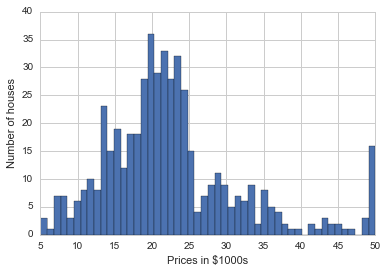

In [6]:
plt.hist(boston.target, bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

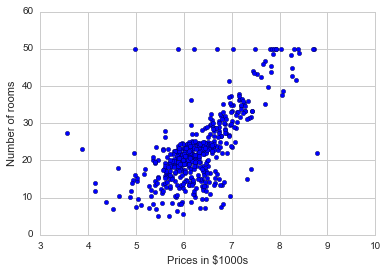

In [15]:
###THE 6TH COLUMN IS THE RM WHICH IS THE NUMBER OF ROOMS (0,1,2,3,4,5) sO THE 5TH

plt.scatter(boston.data[:,5], boston.target)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of rooms')

In [28]:
boston_df=DataFrame(boston.data)

boston_df.columns=boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [29]:
boston_df['Price']=boston.target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


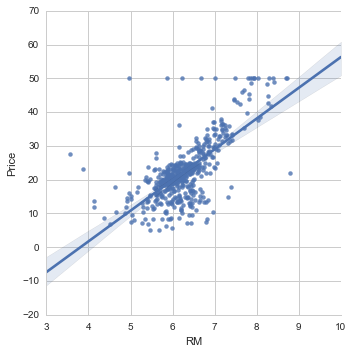

In [30]:
sns.lmplot('RM', 'Price', data=boston_df)

# Using Numpy for a Univariate Linear Regression

In [41]:
# set up X as a median room value

X=boston_df.RM

# Use v to make X two-dimensional-IT needs to be in the form for LM
X=np.vstack(boston_df.RM)

# Set up Y as the target price of the houses
Y=boston_df.Price

In [42]:
# CREATE THE X ARRAY IN THE FORM [X 1]
X=np.array([[value,1] for value in X ])

In [43]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [44]:
m, b=np.linalg.lstsq(X,Y)[0]  ###LEAST SQUARE METHOD - the [0] is for the first index values

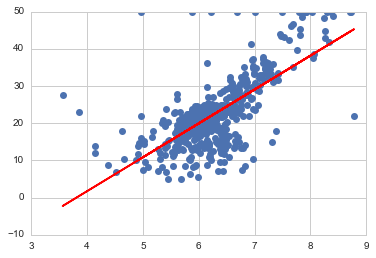

In [46]:
plt.plot(boston_df.RM, boston_df.Price, 'o')  ##this is a scatter plot

x=boston_df.RM

plt.plot(x, m*x+b, 'r', label='Best fit line')

In [58]:
# Get the results array

result=np.linalg.lstsq(X,Y)

# get the total error
error_total=result[1]

# get the root mean square error
rmse=np.sqrt(error_total/len(X))

#Print 
print "The root mean squared arror was %.2f" %rmse

The root mean squared arror was 6.60


In [59]:
result

(array([  9.10210898, -34.67062078]),
 array([ 22061.87919621]),
 2,
 array([ 143.99484122,    2.46656609]))

# Using scikit learn to implement a multivariate regression

In [61]:
# Import for linear regression
import sklearn
from sklearn.linear_model import LinearRegression

In [62]:
# Create a Linear Regression Object afterwads type lm. then press tab to see the list of methods available on this obsect
lreg=LinearRegression()

In [63]:
## lreg. tab show the methods

In [64]:
# Data Columns
X_multi=boston_df.drop('Price',1) # the one comes for the column. keep all columns but not price

###Targets
Y_target=boston_df.Price

In [68]:
lreg.fit(X_multi, Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [70]:
print 'The estimated intercept coefficient is %.2f' %lreg.intercept_
print 'The number of coeffcients used was %d ' %len(lreg.coef_)

The estimated intercept coefficient is 36.49
The number of coeffcients used was 13 


In [71]:
lreg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [72]:
#set a DataFrame from the Features

coeff_df=DataFrame(boston_df.columns)
coeff_df.columns=['Features']

#Set a new column lining up the coeffcicients from the linear regression

coeff_df["Coeffcient Estimate"]=pd.Series(lreg.coef_)

#show
coeff_df

,Features,Coeffcient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [77]:
### good ipynb for regression https://github.com/justmarkham/DAT4/blob/master/notebooks/08_linear_regression.ipynb

In [88]:
k=np.arange(9).reshape(3,3)

In [89]:
k

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [90]:
k[:,0]

array([0, 3, 6])

In [91]:
k[:,2]

array([2, 5, 8])

In [92]:
k[1,:]

array([3, 4, 5])

In [94]:
k[0:2,2]

array([2, 5])

In [95]:
k[0:2,0:1]

array([[0],
       [3]])

In [96]:
k[2::-1, 0]

array([6, 3, 0])

# Training and Validation Sets

In [110]:
# Set as X and Y test and train data sets

X_train, X_test, Y_train, Y_test= sklearn.cross_validation.train_test_split(X,boston_df.Price)

In [111]:
##Print shapes of the training and testing data sets

print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [112]:
lreg=LinearRegression() ## create the object

In [113]:
lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [114]:
###now we can run a prediction

pred_train=lreg.predict(X_train)
pred_test=lreg.predict(X_test)

In [115]:
print "Fit a model X_train, and calculate the MSE with Y_train: %.2f" %np.mean((Y_train-pred_train)**2)
print "Fit a model X_train, and calculate the MSE with X_test and Y_test: %.2f" %np.mean((Y_test-pred_test)**2)

Fit a model X_train, and calculate the MSE with Y_train: 45.82
Fit a model X_train, and calculate the MSE with X_test and Y_test: 37.21


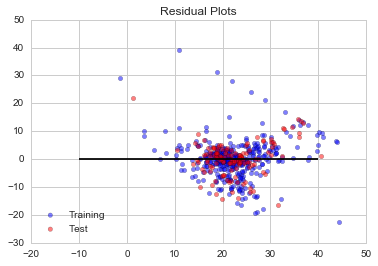

In [121]:
##residual plots

train=plt.scatter(pred_train, (Y_train-pred_train), c='b', alpha=0.5) ##alpha is for transparency

test=plt.scatter(pred_test, (Y_test-pred_test), c='r', alpha=0.5) 

plt.hlines(y=0, xmin=-10, xmax=40)
plt.legend((train,test), ('Training', 'Test'), loc='lower left')
plt.title('Residual Plots')

# Logistic Regression

In [123]:
##Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

##Math
import math

#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

#Machine Learning Imports

from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

#For evaluating our ML results
from sklearn import metrics

#Dataset Import
import statsmodels.api as sm

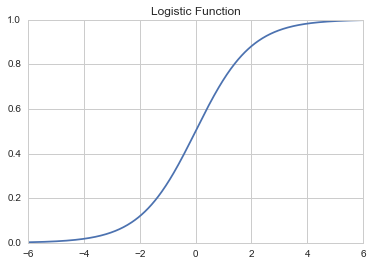

In [126]:
#Logistic Function

def logistic(t):
    return 1.0/(1+math.exp((-1.0)*t))

#set t from -6 to 6 (500 elements, linearly spaced)
t=np.linspace(-6,6,500)
y=np.array([logistic(ele) for ele in t])

#plot 
plt.plot(t,y)
plt.title('Logistic Function')

In [128]:
df= sm.datasets.fair.load_pandas().data  ###this is how you load data from stats to pandas

In [129]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [130]:
def affair_check(x):
    if x!=0:
        return 1
    else:
        return 0

In [131]:
df['Had_Affair']=df['affairs'].apply(affair_check)

In [133]:
df

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,Had_Affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1
5,4.0,27.0,9.0,0.0,2.0,14.0,3.0,4.0,4.666666,1
6,5.0,37.0,23.0,5.5,2.0,12.0,5.0,4.0,0.852174,1
7,5.0,37.0,23.0,5.5,2.0,12.0,2.0,3.0,1.826086,1
8,3.0,22.0,2.5,0.0,2.0,12.0,3.0,3.0,4.799999,1
9,3.0,27.0,6.0,0.0,1.0,16.0,3.0,5.0,1.333333,1


In [134]:
df.groupby('Had_Affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
Had_Affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


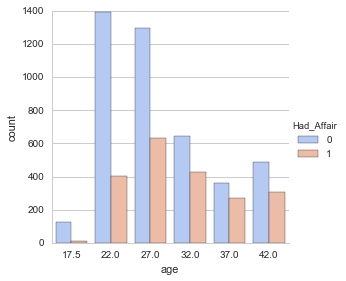

In [136]:
sns.factorplot('age', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

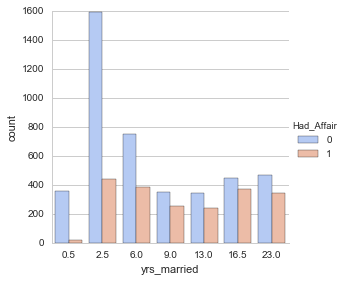

In [137]:
sns.factorplot('yrs_married', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

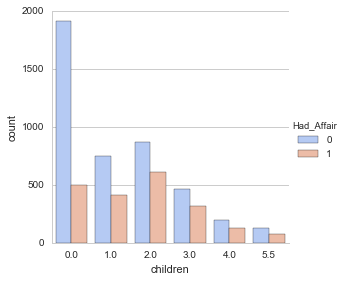

In [138]:
sns.factorplot('children', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

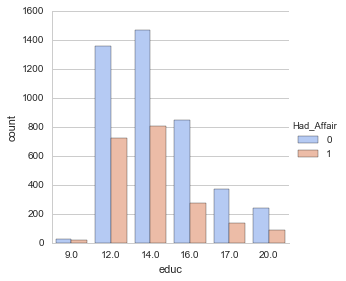

In [139]:
sns.factorplot('educ', data=df, hue='Had_Affair', kind='count', palette='coolwarm')

In [144]:
# Create new DataFrames for the Categorical Variables

occ_dummies=pd.get_dummies(df['occupation'])
hus_occ_dummies=pd.get_dummies(df['occupation_husb'])

##lets take a quick look
occ_dummies

,1.0,2.0,3.0,4.0,5.0,6.0
0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
occ_dummies.columns=['occ1', 'occ2', 'occ3', 'occ4', 'occ5', 'occ6']
hus_occ_dummies.columns=['hocc1', 'hocc2', 'hocc3', 'hocc4', 'hocc5', 'hocc6']

In [151]:
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis=1)

In [152]:
dummies=pd.concat([occ_dummies, hus_occ_dummies], axis=1)

In [153]:
dummies.head()

,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [154]:
X=pd.concat([X,dummies], axis=1)

In [156]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,affairs,occ1,occ2,occ3,occ4,occ5,occ6,hocc1,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,0.111111,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,3.230769,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,1.400000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.727273,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,4.666666,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [157]:
Y=df.Had_Affair

Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Had_Affair, dtype: int64

In [159]:
Y.tail()

6361    0
6362    0
6363    0
6364    0
6365    0
Name: Had_Affair, dtype: int64

### Multicollinearity

In [160]:
X=X.drop('occ1', axis=1)

In [161]:
X=X.drop('hocc1', axis=1)

In [162]:
X=X.drop('affairs', axis=1)

In [163]:
X.head()

,rate_marriage,age,yrs_married,children,religious,educ,occ2,occ3,occ4,occ5,occ6,hocc2,hocc3,hocc4,hocc5,hocc6
0,3.0,32.0,9.0,3.0,3.0,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.0,27.0,13.0,3.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,4.0,22.0,2.5,0.0,1.0,16.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.0,37.0,16.5,4.0,3.0,16.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,5.0,27.0,9.0,1.0,1.0,14.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [165]:
Y=np.ravel(Y)  ##TRANSFORM TO AN 1D array

In [166]:
Y

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [168]:
log_model=LogisticRegression()

log_model.fit(X,Y)

log_model.score(X,Y)  ##accuracy rate

0.72588752748978946

In [169]:
coeff_df=DataFrame(zip(X.columns, np.transpose(log_model.coef_)))

In [170]:
coeff_df

,0,1
0,rate_marriage,[-0.697924125998]
1,age,[-0.0563646299078]
2,yrs_married,[0.103919041638]
3,children,[0.0181622363802]
4,religious,[-0.368517662336]
5,educ,[0.00875505261517]
6,occ2,[0.298052262971]
7,occ3,[0.607992729515]
8,occ4,[0.346221679741]
9,occ5,[0.942505111823]


In [171]:
np.transpose(log_model.coef_)

array([[-0.69792413],
       [-0.05636463],
       [ 0.10391904],
       [ 0.01816224],
       [-0.36851766],
       [ 0.00875505],
       [ 0.29805226],
       [ 0.60799273],
       [ 0.34622168],
       [ 0.94250511],
       [ 0.90569949],
       [ 0.21860633],
       [ 0.32451947],
       [ 0.18830516],
       [ 0.21180497],
       [ 0.21469066]])

### Testing and Training

In [172]:
X_train, X_test, Y_train, Y_test= sklearn.cross_validation.train_test_split(X,Y)

In [173]:
log_model2=LogisticRegression()

log_model2.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [174]:
class_predict=log_model2.predict(X_test)

In [175]:
print metrics.accuracy_score(Y_test, class_predict)

0.732412060302


In [176]:
###another good link http://blog.yhat.com/posts/logistic-regression-and-python.html using statsmodels library

# Multi-Class Classification

In [177]:
##Data Imports
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


#Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


In [178]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [182]:
iris=load_iris()

In [183]:
X=iris.data
Y=iris.target

In [186]:
print iris.DESCR

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [187]:
iris_data=DataFrame(X, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])

In [188]:
iris_target=DataFrame(Y, columns=['Species'])

In [189]:
### rename species from numbers to names
def flower(num):
    if num==0:
        return 'Setosa'
    elif num==1:
        return 'Versicolour'
    else:
        return 'Virginica'

In [190]:
iris_target['Species']=iris_target['Species'].apply(flower)

In [191]:
iris_target.head()

,Species
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa


In [192]:
iris=pd.concat([iris_data, iris_target], axis=1)  ###merge the X and Y for visualization

In [193]:
iris.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


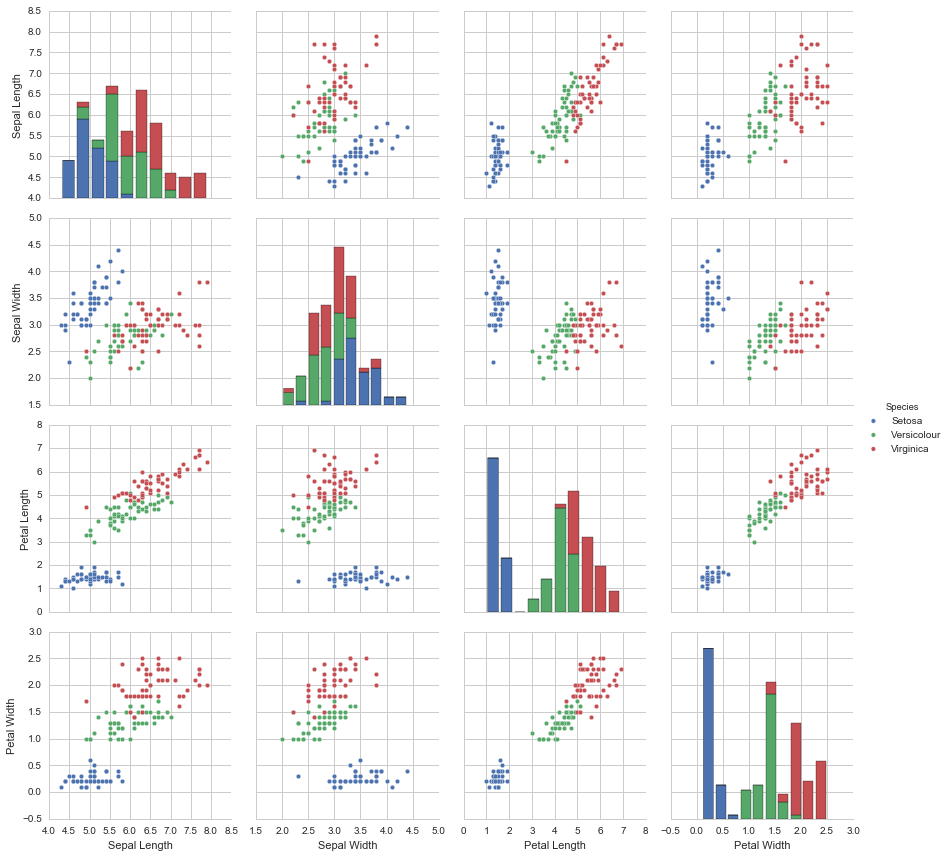

In [195]:
sns.pairplot(data=iris, hue='Species', size=3)

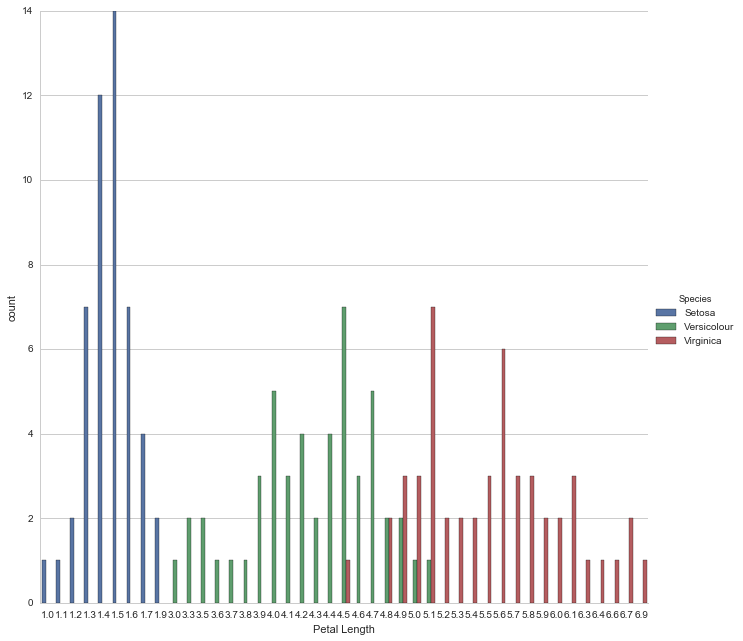

In [224]:
sns.factorplot('Petal Length', data=iris, hue='Species', kind='count', size=9)

# Multi-Class Classification with Sci Kiyt Learn

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

#Create a Logistic Regression Class object
logreg=LogisticRegression()

#Split the data into Training and Testing sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.4, random_state=3)

#Train the model with the training set
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [203]:
from sklearn import metrics

In [204]:
Y_pred=logreg.predict(X_test)

In [206]:
print metrics.accuracy_score(Y_test, Y_pred)

0.933333333333


In [214]:
### we could have used the character column of target variable but first we will need to ravel
Y2=np.ravel(iris_target)

In [216]:
#Split the data into Training and Testing sets
X_train, X_test, Y_train, Y_test=train_test_split(X,Y2,test_size=0.4, random_state=3)

In [217]:
logreg=LogisticRegression()

In [218]:
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [219]:
Y2_pred=logreg.predict(X_test)

In [220]:
Y2_pred

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Virginica',
       'Versicolour', 'Setosa', 'Virginica', 'Versicolour', 'Versicolour',
       'Setosa', 'Versicolour', 'Versicolour', 'Virginica', 'Setosa',
       'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Virginica',
       'Virginica', 'Virginica', 'Versicolour', 'Setosa', 'Virginica',
       'Virginica', 'Versicolour', 'Versicolour', 'Versicolour', 'Setosa',
       'Setosa', 'Virginica', 'Versicolour', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Versicolour', 'Virginica',
       'Versicolour', 'Setosa', 'Setosa', 'Virginica', 'Versicolour',
       'Setosa', 'Virginica', 'Virginica', 'Virginica', 'Setosa', 'Setosa',
       'Virginica', 'Versicolour', 'Versicolour', 'Setosa', 'Virginica',
       'Setosa', 'Virginica', 'Versicolour'], dtype=object)

In [221]:
print metrics.accuracy_score(Y_test, Y2_pred)

0.933333333333


# K-Nearest Neighbors

In [225]:
from sklearn.neighbors import KNeighborsClassifier

In [226]:
knn=KNeighborsClassifier(n_neighbors=6)  ### k equal to 6

In [227]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [228]:
Y_pred=knn.predict(X_test)

In [229]:
print metrics.accuracy_score(Y_test, Y_pred)

0.95


In [230]:
###lets try to take k equal to 1
knn=KNeighborsClassifier(n_neighbors=1)  ### k equal to 1

In [231]:
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [232]:
Y_pred=knn.predict(X_test)

In [233]:
print metrics.accuracy_score(Y_test, Y_pred)

0.966666666667


In [235]:
k_range=range(1,21)  ##we will run a loop with 20 k and compare the accuracy

accuracy=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, Y_train)
    Y_pred=knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))
    

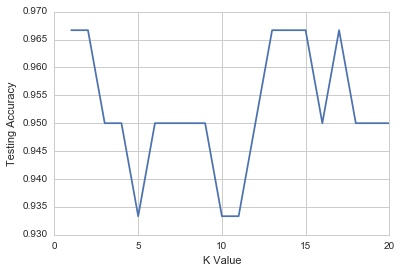

In [237]:
plt.plot(k_range, accuracy)
plt.xlabel('K Value')
plt.ylabel('Testing Accuracy')

# Support Vector Machines (SVM)

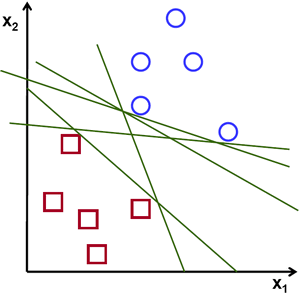

In [240]:
from IPython.display import Image
url='http://docs.opencv.org/2.4/_images/separating-lines.png'
Image(url)

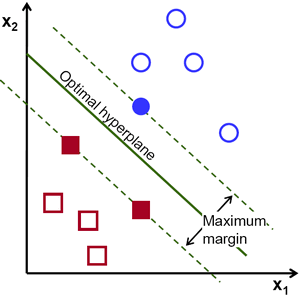

In [241]:
url2='http://docs.opencv.org/2.4/_images/optimal-hyperplane.png'
Image(url2)

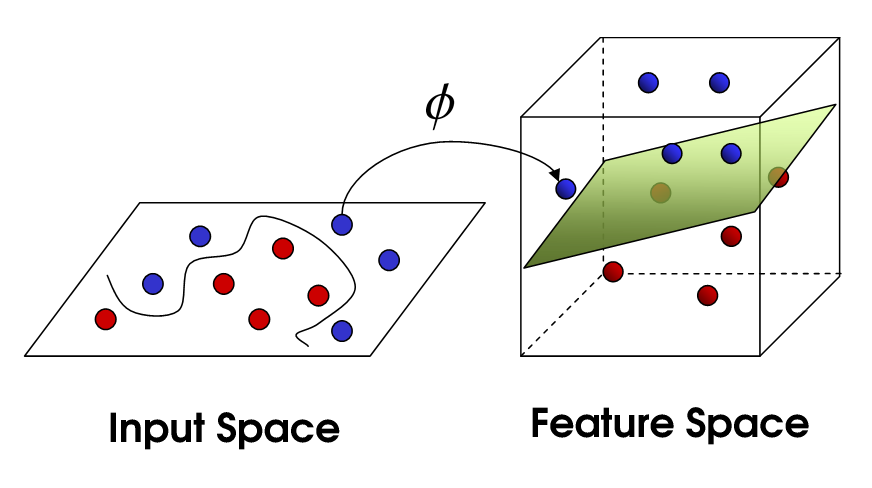

In [242]:
url3='http://i.imgur.com/WuxyO.png'
Image(url3)

In [243]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
from sklearn import datasets

In [245]:
iris=datasets.load_iris()

X=iris.data
Y=iris.target

In [246]:
from sklearn.svm import SVC #IMPORT THE SUPPORT VECTOR CLASSIFICATION

In [247]:
model=SVC()

In [249]:
from sklearn.cross_validation import train_test_split

In [258]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.4, random_state=3)

In [259]:
model.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [260]:
from sklearn import metrics

In [261]:
predicted=model.predict(X_test)

expected=Y_test

In [262]:
print metrics.accuracy_score(expected, predicted)

0.966666666667


In [278]:

# Import all SVM 
from sklearn import svm

# We'll use all the data and not bother with a split between training and testing. We'll also only use two features.
X = iris.data[:,:2]
Y = iris.target

# SVM regularization parameter
C = 1.0  

# SVC with a Linear Kernel  (our original example)
svc = svm.SVC(kernel='linear', C=C).fit(X, Y)

# Gaussian Radial Bassis Function
rbf_svc = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, Y)

# SVC with 3rd degree poynomial
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(X, Y)

# SVC Linear
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [279]:
# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [280]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


C:\Users\gpipis\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\contour.py:919: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


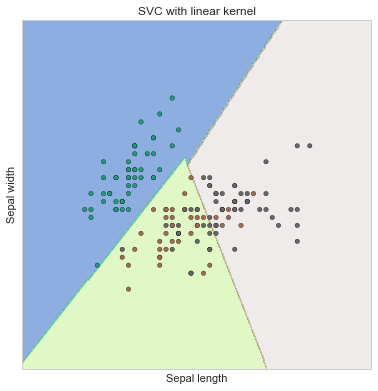

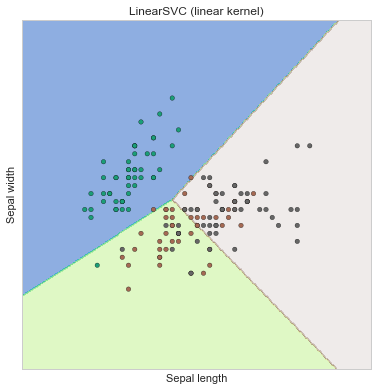

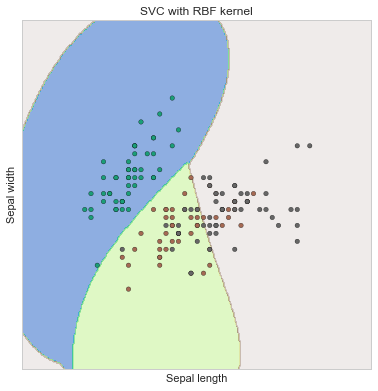

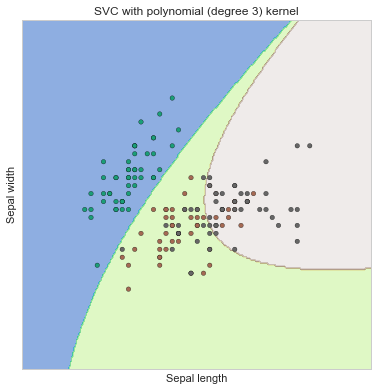

In [281]:
# Use enumerate for a count
for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()

# Naive Bayes

In [282]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [284]:
# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target



In [285]:
# Fit a Naive Bayes model to the data
model = GaussianNB()

In [286]:
from sklearn.cross_validation import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size=0.4, random_state=3)

In [287]:
# Fit the training model
model.fit(X_train,Y_train)

GaussianNB()

In [288]:
# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = Y_test

In [289]:
print metrics.accuracy_score(expected, predicted)

0.983333333333


# Decision Trees and Random Forest

In [290]:

#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

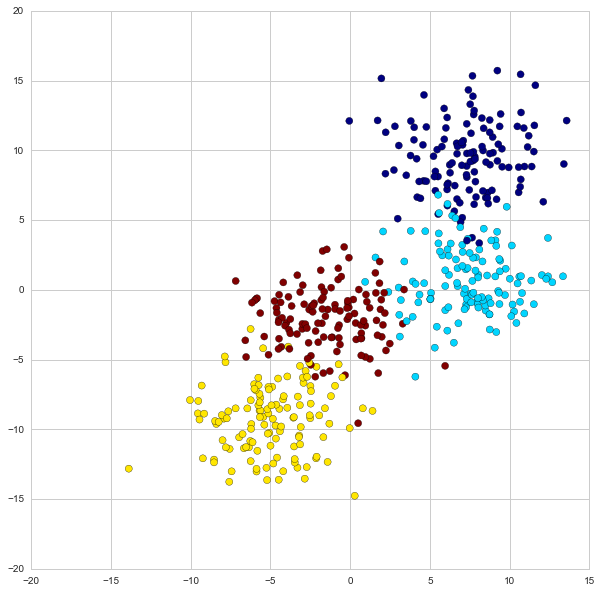

In [292]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet') ##plot X1, X2 and color label = y (c=y comes from the color label)

In [303]:
from sklearn.tree import DecisionTreeClassifier

### Visualization Function

In [304]:

def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

### Let's plot out a Decision Tree boundary with a max depth of two branches

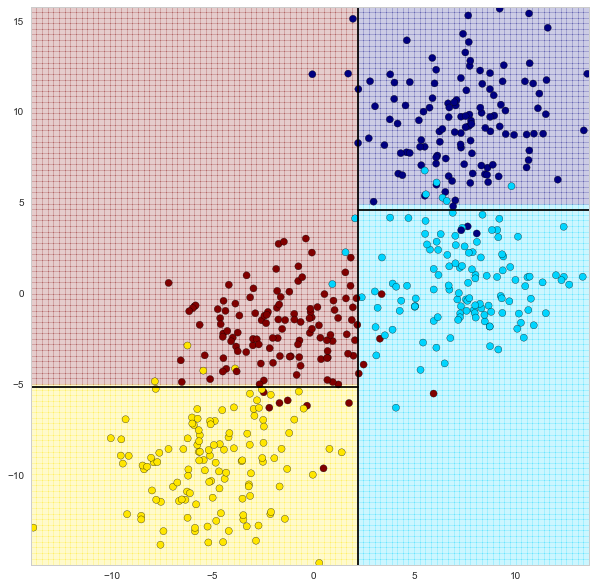

In [305]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

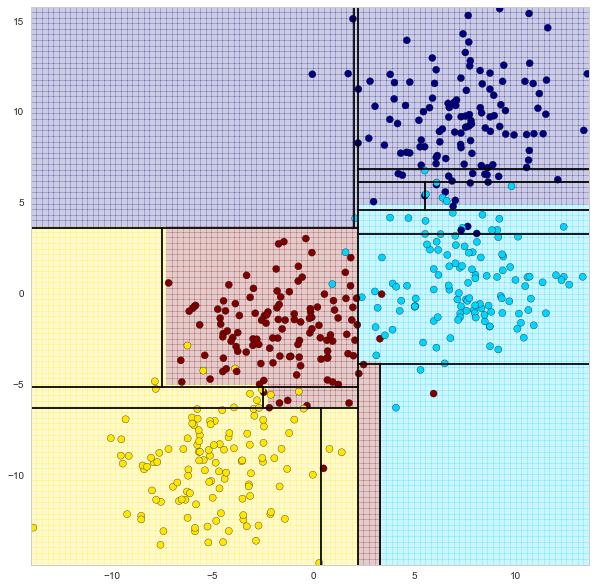

In [306]:
##How about 4 levels deep?


# Set model variable
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

Notice how changing the depth of the decision causes the boundaries to change substantially! If we pay close attention to the second model we can begin to see evidence of over-fitting. This basically means that if we were to try to predict a new point the result would be influenced more by the noise than the signal.
So how do we address this issue? The answer is by creating an ensemble of decision trees.

## Random Forests

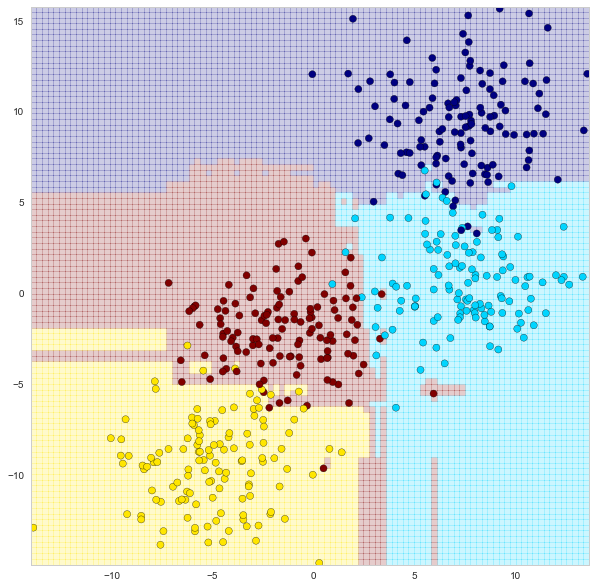

In [307]:

from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

### Random Forest Regression

We can also use Random Forests for Regression! Let's see a quick example!
Let's imagine we have some sort of weather data thats sinusoidal in nature with some noise. It has a slow oscillation component, a fast oscillation component, and then a random noise component.

<Container object of 3 artists>

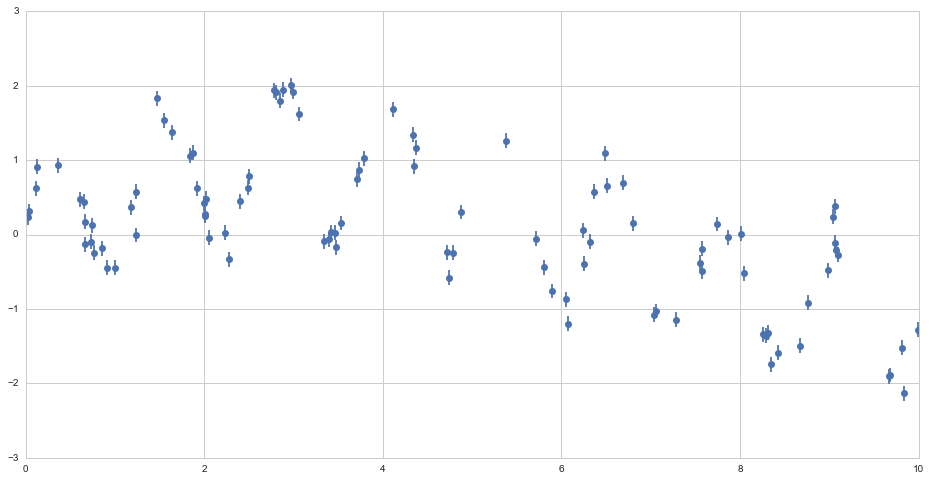

In [309]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')


Now lets use a Random Forest Regressor to create a fitted regression, obviously a standard linear regression approach wouldn't work here. And if we didn't know anything about the true nature of the model, polynomial or sinusoidal regression would be tedious.

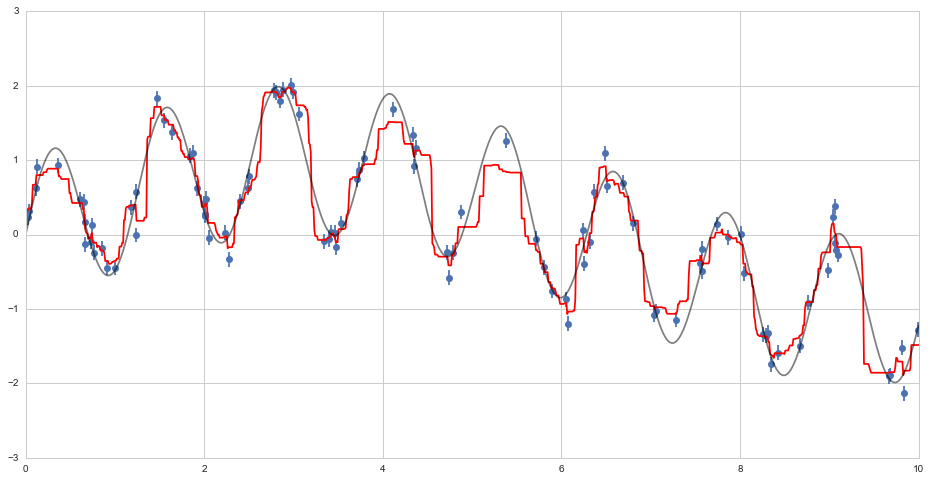

In [319]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);


As you can see, the non-parametric random forest model is flexible enough to fit the multi-period data, without us even specifying a multi-period model!
This is a tradeoff between simplicity and thinking about what your data actually is.

# Natural Language Processing

This is the notebook that goes along with the NLP video lecture!
In this lecture we will discuss a higher level overview of the basics of Natural Language Processing, which basically consists of combining machine learning techniques with text, and using math and statistics to get that text in a format that the machine learning algorithms can understand!
In this lecture we will go over:
Part 1: Data

Part 2: Basic Exploratory Data Analysis

Part 3: Text Pre-Processing

Part 4: Vectorization

Part 6: Model Evaluation

Part 7: Creating a Data Pipeline

### Requirements: You will need to have NLTK installed, along with downloading the corpus for stopwords. To download everything with a conda installation, run the cell below:

In [320]:
# ONLY RUN THIS CELL IF YOU NEED 
# TO DOWNLOAD NLTK AND HAVE CONDA

# Uncomment the code below and run:


# !conda install nltk #This installs nltk
# import nltk # Imports the library
# nltk.download() #Download the necessary datasets

We'll be using a dataset from the UCI datasets! Go to https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection and download the zip file. Unzip it in the same place as whatever notebook your working in. (Type pwd into code cell to find out where you working directory is). Or just make sure to know the exact path to the data so you can put into your code later on.
The file we are using contains a collection of more than 5 thousand SMS phone messages. You can check out the readme file for more info.
Let's go ahead and use rstrip() plus a list comprehension to get a list of all the lines of text messages:

In [1]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]
print len(messages)

5574


In [2]:
# A collection of texts is also sometimes called "corpus". Let's print the first ten messages and number them using enumerate:

for message_no, message in enumerate(messages[:10]):
    print message_no, message
    print '\n'

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [3]:
import pandas

In [4]:
messages = pandas.read_csv('SMSSpamCollection', sep='\t',
                           names=["label", "message"])
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Part 2: Basic Exploratory Data Analysis

In [5]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
messages.groupby('label').describe()

message
label                                                          
ham   count                                                4825
      unique                                               4516
      top                                Sorry, I'll call later
      freq                                                   30
spam  count                                                 747
      unique                                                653
      top     Please call our customer service representativ...
      freq                                                    4

In [7]:
messages['length'] = messages['message'].apply(len)
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

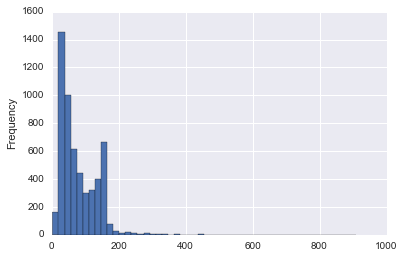

In [9]:

messages['length'].plot(bins=50, kind='hist') 

In [10]:
messages.length.describe()

count    5572.000000
mean       80.616296
std        60.015593
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [11]:
#Woah! 910 characters, let's use masking to find this message:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000000AFA9A58>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x000000000B364828>], dtype=object)

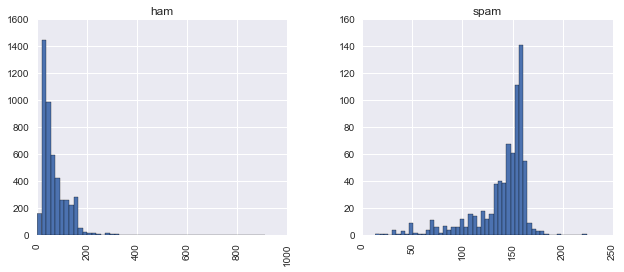

In [22]:

messages.hist(column='length', by='label', bins=50,figsize=(10,4))

### Part 3: Text pre-processing

In [23]:
import string

mess = 'Sample message! Notice: it has punctuation.'

# Check characters to see if they are in punctuation
nopunc = [char for char in mess if char not in string.punctuation]

# Join the characters again to form the string.
nopunc = ''.join(nopunc)

In [24]:
nopunc

'Sample message Notice it has punctuation'

In [25]:
from nltk.corpus import stopwords
stopwords.words('english')[0:10] # Show some stop words

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

In [26]:

nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [27]:
# Now just remove any stopwords
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [28]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

In [29]:
###Now let's put both of these together in a function to apply it to our DataFrame later on:

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [30]:
###the original data frame
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now let's "tokenize" these messages. Tokenization is just the term used to describe the process of converting the normal text strings in to a list of tokens (words that we actually want).
Let's see an example output on on column:
Note: We may get some warnings or errors for symbols we didn't account for or that weren't in Unicode (like a british pound symbol)

In [31]:
# Check to make sure its working
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

There are a lot of ways to continue normalizing this text. Such as Stemming or distinguishing by part of speech.
NLTK has lots of built-in tools and great documentation on a lot of these methods. Sometimes they don't work well for text-messages due to the way a lot of people tend to use abbreviations or shorthand, For example:
'Nah dawg, IDK! Wut time u headin to da club?'

versus
'No dog, I don't know! What time are you heading to the club?'

Some text normalization methods will have trouble with this type of shorthand and so I'll leave you to explore those more advanced methods through the NLTK book online.
For now we will just focus on using what we have to convert our list of words to an actual vector that SciKit-Learn can use.

### Part 4: Vectorization

In [32]:

from sklearn.feature_extraction.text import CountVectorizer

There are a lot of arguments and parameters that can be passed to the CountVectorizer. In this case we will just specify the analyzer to be our own previously defined function:

In [33]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

# Print total number of vocab words
print len(bow_transformer.vocabulary_)

C:\Users\gpipis\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


11425


In [35]:
message4 = messages['message'][3]
print message4

U dun say so early hor... U c already then say...


In [36]:
bow4 = bow_transformer.transform([message4])
print bow4
print bow4.shape

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2
(1, 11425)


In [38]:
###This means that there are seven unique words in message number 4 (after removing common stop words). Two of them appear twice,
#### the rest only once. Let's go ahead and check and confirm which ones appear twice:
print bow_transformer.get_feature_names()[4073]
print bow_transformer.get_feature_names()[9570]

UIN
schedule


Now we can use .transform on our Bag-of-Words (bow) transformed object and transform the entire DataFrame of messages. Let's go ahead and check out how the bag-of-words counts for the entire SMS corpus is a large, sparse matrix:

In [39]:
messages_bow = bow_transformer.transform(messages['message'])
print 'Shape of Sparse Matrix: ', messages_bow.shape
print 'Amount of Non-Zero occurences: ', messages_bow.nnz
print 'sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

C:\Users\gpipis\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


So what is TF-IDF?
TF-IDF stands for term frequency-inverse document frequency, and the tf-idf weight is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.
One of the simplest ranking functions is computed by summing the tf-idf for each query term; many more sophisticated ranking functions are variants of this simple model.
Typically, the tf-idf weight is composed by two terms: the first computes the normalized Term Frequency (TF), aka. the number of times a word appears in a document, divided by the total number of words in that document; the second term is the Inverse Document Frequency (IDF), computed as the logarithm of the number of the documents in the corpus divided by the number of documents where the specific term appears.
TF: Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:
TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).
IDF: Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:
IDF(t) = log_e(Total number of documents / Number of documents with term t in it).
See below for a simple example.
Example:
Consider a document containing 100 words wherein the word cat appears 3 times.
The term frequency (i.e., tf) for cat is then (3 / 100) = 0.03. Now, assume we have 10 million documents and the word cat appears in one thousand of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,000) = 4. Thus, the Tf-idf weight is the product of these quantities: 0.03 * 4 = 0.12.

In [40]:

from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print tfidf4

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


In [41]:
print tfidf_transformer.idf_[bow_transformer.vocabulary_['u']]
print tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

3.28005242674
8.5270764989


### Training a Model

In [43]:
###We'll be using scikit-learn here, choosing the Naive Bayes classifier to start with:

messages_tfidf = tfidf_transformer.transform(messages_bow)
print messages_tfidf.shape


(5572, 11425)


In [44]:

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [45]:
#Let's try classifying our single random message and checking how we do:
print 'predicted:', spam_detect_model.predict(tfidf4)[0]
print 'expected:', messages.label[3]

predicted: ham
expected: ham


### Part 6: Model Evaluation

In [46]:
###Now we want to determine how well our model will do overall on the entire dataset. Let's beginby getting all the predictions:

all_predictions = spam_detect_model.predict(messages_tfidf)
print all_predictions

['ham' 'ham' 'spam' ..., 'ham' 'ham' 'ham']


In [47]:
from sklearn.metrics import classification_report
print classification_report(messages['label'], all_predictions)

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [48]:
from sklearn.cross_validation import train_test_split

msg_train, msg_test, label_train, label_test = \
train_test_split(messages['message'], messages['label'], test_size=0.2)

print len(msg_train), len(msg_test), len(msg_train) + len(msg_test)

4457 1115 5572


### Part 7: Creating a Data Pipeline

In [49]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [50]:
pipeline.fit(msg_train,label_train)

C:\Users\gpipis\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


Pipeline(steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000000000CAD7588>,
        binary=False, decode_error=u'strict', dtype=<type 'numpy.int64'>,
        encoding=u'utf-8', input=u'content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preproces...         use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [51]:
predictions = pipeline.predict(msg_test)

C:\Users\gpipis\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:17: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal


In [52]:
print classification_report(predictions,label_test)

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1004
       spam       0.76      1.00      0.86       111

avg / total       0.98      0.97      0.97      1115



Now we have a classification report for our model on a true testing set! There is a lot more to Natural Language Processing than what we've covered here, and its vast expanse of topic could fill up several college courses! I encourage you to check out the resources below for more information on NLP!